# WeatherPy
----

## Notebook and API Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
import pprint
import openweathermapy.core as owm

# Import datetime for today's (execution) date
import datetime
now = datetime.datetime.now().strftime("%Y-%m-%d")

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Outputs/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
settings = {"units": "Imperial", "appid": api_key}

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination, save non-repeating entries.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
if len(cities) < 500:
    print("WARNING: UNDER 500 DATA POINTS, PLEASE RUN AGAIN FOR MORE")
print(f"Initialized {len(cities)} city names.")

Initialized 620 city names.


## Performing API Calls

#### Preparing Dataframe

In [3]:
# Dataframe setup
weather_df = pd.DataFrame()
weather_df["City"] = cities
weather_df["Country"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Date"] = ""
weather_df["Max Temp"] = ""
weather_df["Humidity"] = ""
weather_df["Clouds"] = ""
weather_df["Wind Speed"] = ""

#### Collecting Data through API Pulls

In [4]:
# Populate dataframe using API pulls
missedtot = 0 # variable to keep up with data loss
for i in range(len(cities)): 
    try:
        ctmp = weather_df["City"][i]
        tmp = owm.get_current(weather_df["City"][i], **settings)
        weather_df.loc[i, 'Country'] = tmp['sys']['country']        
        weather_df.loc[i, 'Lat'] = tmp['coord']['lat']
        weather_df.loc[i, 'Lng'] = tmp['coord']['lon']
        weather_df.loc[i, 'Date'] = tmp['dt']
        weather_df.loc[i, 'Max Temp'] = tmp['main']['temp_max']
        weather_df.loc[i, 'Humidity'] = tmp['main']['humidity']
        weather_df.loc[i, 'Clouds'] = tmp['clouds']['all']
        weather_df.loc[i, 'Wind Speed'] = tmp['wind']['speed']
        time.sleep(1.0001) # Pull limit is 60/min
        print(f"{i} out of {len(cities)} | Found data for: {ctmp.title()}")
    except: 
        missedtot +=1
        print(f"No data for index ({i})... skipping.")       
print(f"For {len(cities)}, dropped {missedtot} ({round(missedtot/len(cities)*100,1)}% lost)")
print("Cleaning and saving dataframe...")

# Clean and save data
weather_df.replace('', np.nan, inplace=True)
weather_df = weather_df.dropna()
weather_df.to_csv(output_data_file)
weather_df.head()

No data for index (0)... skipping.
1 out of 620 | Found data for: Eidfjord
No data for index (2)... skipping.
3 out of 620 | Found data for: Pocoes
No data for index (4)... skipping.
5 out of 620 | Found data for: Dubai
6 out of 620 | Found data for: Jamestown
7 out of 620 | Found data for: Rikitea
8 out of 620 | Found data for: Samfya
9 out of 620 | Found data for: Cape Town
10 out of 620 | Found data for: Cherskiy
No data for index (11)... skipping.
12 out of 620 | Found data for: Butaritari
13 out of 620 | Found data for: Avera
14 out of 620 | Found data for: Naze
15 out of 620 | Found data for: Atuona
16 out of 620 | Found data for: Ushuaia
17 out of 620 | Found data for: Nikolskoye
18 out of 620 | Found data for: Victoria
19 out of 620 | Found data for: Vaini
20 out of 620 | Found data for: Tianpeng
21 out of 620 | Found data for: Kodiak
22 out of 620 | Found data for: New Norfolk
23 out of 620 | Found data for: Chokurdakh
24 out of 620 | Found data for: Albany
25 out of 620 | Fou

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Clouds,Wind Speed
1,eidfjord,NO,60.47,7.07,1.565570e+09,51.01,86.0,81.0,3.09
3,pocoes,BR,-14.53,-40.37,1.565570e+09,62.63,96.0,13.0,5.86
5,dubai,AE,25.27,55.30,1.565570e+09,91.40,79.0,0.0,6.93
6,jamestown,AU,-33.21,138.60,1.565570e+09,46.07,72.0,6.0,0.85
7,rikitea,PF,-23.12,-134.97,1.565570e+09,72.53,83.0,99.0,18.34


## Plotting the Data

#### Latitude vs. Temperature Plot

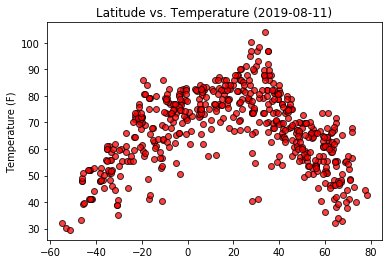

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure()
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],edgecolor='k',color='r',alpha=0.75)
plt.title(f"Latitude vs. Temperature ({now})")
plt.ylabel("Temperature (F)")
plt.show()
plt.savefig("Outputs/LatvTemp.png")

#### Latitude vs. Humidity Plot

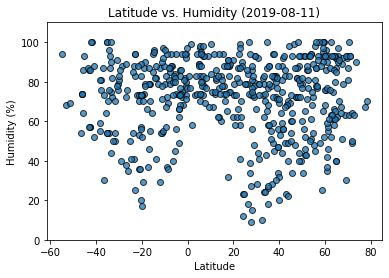

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure()
plt.scatter(weather_df['Lat'],weather_df['Humidity'],edgecolor='k',alpha=0.75)
plt.title(f"Latitude vs. Humidity ({now})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# plt.ylim(0,110) # Used if there are instances of Oversaturated Air 
plt.show()
plt.savefig("Outputs/LatvHum.png")

#### Latitude vs. Cloudiness Plot

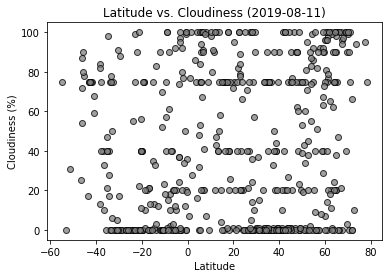

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure()
plt.scatter(weather_df['Lat'],weather_df['Clouds'],edgecolor='k',color='gray',alpha=0.75)
plt.title(f"Latitude vs. Cloudiness ({now})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig("Outputs/LatvCloud.png")

#### Latitude vs. Wind Speed Plot

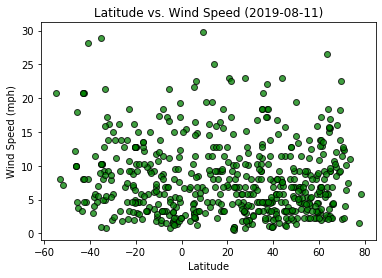

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure()
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],edgecolor='k',color='g',alpha=0.75)
plt.title(f"Latitude vs. Wind Speed ({now})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig("Outputs/LatvWind.png")

#### Latitude/Longitude Distributions (Map plot)

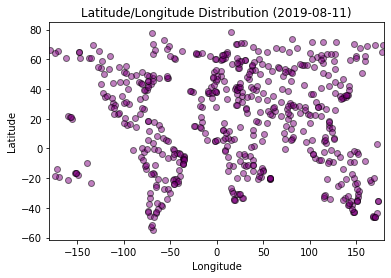

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure()
plt.scatter(weather_df['Lng'],weather_df['Lat'],edgecolor='k',color="purple",alpha=0.5)
plt.xlim(-180,180)

plt.title(f"Latitude/Longitude Distribution ({now})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Outputs/LatLongDist.png")

#### Latitude/Longitude Distributions (Histogram plot)

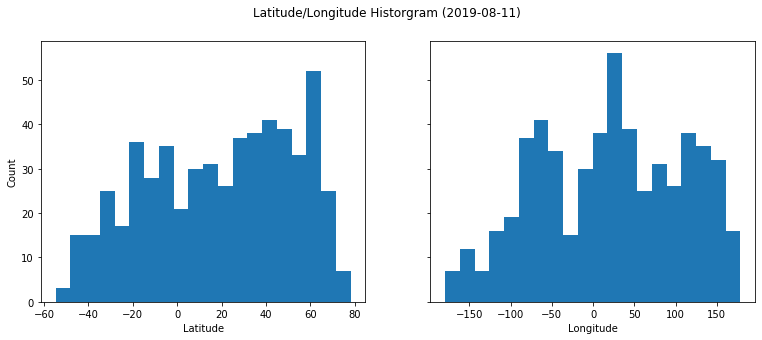

<Figure size 432x288 with 0 Axes>

In [10]:
pt, ax = plt.subplots(1,2,sharey=True,figsize=[12.8, 4.8])

ax[0].hist(weather_df['Lat'],bins=20)
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Latitude")
ax[1].hist(weather_df['Lng'],bins=20)
ax[1].set_xlabel("Longitude")
plt.suptitle(f"Latitude/Longitude Historgram ({now})")
plt.show()
plt.savefig("Outputs/LatLnghist.png")

----
# Analysis

### Trend 1: 
For this randomly selected dataset, I found that max temperatures tend to decrese with increasing latitude, peaking at ~25 degrees latitude. That being said, the positive latitudinal half accounts for the majority of the data, as the Northern Hemisphere has a majority of the landmass. Cloudiness follows a similar trend in the Northern Hemisphere as well, and this may again be attributed to the larger amount of landmass in the Northern Hemisphere.

### Trend 2:
Low humidity areas tend to be closer to the equator, with some of the lowest humidity readings coming from between 20-30 degrees North or South of the equator. Lowest humidities tend to go to higher percents outside of the 20-30 degree (North/South). There have been some instances of oversaturated air, where humidity exceeds 100%. Otherwise, humidity tends to be < 60% for most reported latitudes. Windiness does not appear to have a strong correlation with latitudes.

### Trend 3:
With over 500 data points, I am able to get a set of data that's well distributed across the continents. That being said, there are some holes in the data. Certain regions of continents don't tend to appear in the data set, and most of these are in scarcely inhabited or inhabitable areas such as the Amazon Rainforest, Sahara Desert, the outback of Austrailia, and Northern regions of Northern Hemisphere continents. Throughout this project, I regularly saw holes in my Latitude/Longitude
data distribution. 